# CRISP-DM

## 1. Entendimento do Negócio

Com o aumento das transações eletrônicas em pontos de venda físicos, o uso de cartões de crédito tornou-se essencial no cotidiano. No entanto, essa facilidade também trouxe um aumento nas fraudes, incluindo transações fraudulentas em terminais físicos comprometidos e ataques direcionados a esses locais.
Fraudes em terminais físicos prejudicam financeiramente as instituições e afetam a confiança dos consumidores, além de impactar negativamente a reputação das empresas envolvidas. Por isso, enfretamos uma demanda crescente por soluções automatizadas que possam examinar rapidamente grandes volumes de transações e identificar padrões de fraude em terminais físicos.

**Objetivo**: 
Neste Case, o objetivo é desenvolver um modelo de machine learning para detecção de fraudes em cartões de crédito, focado exclusivamente em transações realizadas em terminais físicos.

Como não há um modelo prévio de detecção de fraude, todas as fraudes são contabilizadas como perdas. Assim, o baseline inicial será definido como:

$\text{total perdido}$ = $\text{total fraud}$

sendo: 
- $\text{total fraud}$ = soma de todos os valores das transações consideradas fraude no periodo avaliado

## 2. Entendimento dos Dados

**Objetivo**: Nosso conjunto de dados foi obtido a partir do livro: 
- https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html

Nosso conjunto de dados é composto por duas tabelas:
1. transactions
    - **transaction_id**: Identificador único das transações;

    - **tx_datetime**: Date e hora que a transação ocorreu;

    - **customer_id**: Identificador único do cliente. Cada cliente tem um identificador único;

    - **tx_amount**: Valor da transação;

    - **tx_time_seconds**: Datetime em segundos
    
    - **tx_fraud**: Variável binária, com o valor 0 para transações legitmas e 1 para transações fraudulentas.


2. Customer
    - **customer_id**: The customer unique ID

    - **(x_customer_id,y_customer_id)**: Par de coordenadas reais em uma grade 100*100 que define a localização geográfica do cliente.
    
    - **mean_amount / std_amount**: A média e o desvio padrão dos valores de transação dos clientes.

## 3. Preparação dos Dados

**Objetivo**: Criar features robustas e eliminar informações desnecessárias.
    
- Ciclo 01:
    - Manter as variáveis originais

## 4. Modelagem

**Objetivo**: Construir modelos preditivos e avaliar performance.
    
- Ciclo 01:
    - Criar Random Forest com todas as features para obter um novo baseline.
    - Calcular AUC-ROC, Recall, Precision, F1-Score.
    - Analisar Feature Importance para identificar possíveis redundâncias.

## 5. Avaliação

**Objetivo**: Verificar se o modelo atende às necessidades de detecção de fraudes.

- Construir um novo $\text{total perdido}$ baseado na matriz de confusão.

- Métricas principais: 
    - Matriz de Confusão
    - AUC-ROC, 
    - Recall, 
    - Precision, 
    - F1-Score

## 6. Deploy (Produção)

Em breve, nos próximos ciclos será definido.

# Projeto

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Read Csv Files

In [3]:
main_dir = '../'

transactions_df = pd.read_csv(f'{main_dir}data/raw/new_transactions.csv')
customer_profiles_table = pd.read_csv(f'{main_dir}data/external/new_customer_profiles_table.csv')
terminal_profiles_table = pd.read_csv(f'{main_dir}data/external/new_terminal_profiles_table.csv')

# Checando Tipos

In [4]:
transactions_df.dtypes

transaction_id       int64
tx_datetime         object
customer_id          int64
terminal_id          int64
tx_amount          float64
tx_time_seconds      int64
tx_time_days         int64
tx_fraud             int64
dtype: object

In [5]:
customer_profiles_table.dtypes

customer_id             int64
x_customer_id         float64
y_customer_id         float64
mean_amount           float64
std_amount            float64
mean_nb_tx_per_day    float64
dtype: object

In [6]:
terminal_profiles_table.dtypes

terminal_id        int64
x_terminal_id    float64
y_terminal_id    float64
dtype: object

# Checando NA

In [7]:
transactions_df.isna().sum()

transaction_id     0
tx_datetime        0
customer_id        0
terminal_id        0
tx_amount          0
tx_time_seconds    0
tx_time_days       0
tx_fraud           0
dtype: int64

In [8]:
customer_profiles_table.isna().sum()

customer_id           0
x_customer_id         0
y_customer_id         0
mean_amount           0
std_amount            0
mean_nb_tx_per_day    0
dtype: int64

In [9]:
terminal_profiles_table.isna().sum()

terminal_id      0
x_terminal_id    0
y_terminal_id    0
dtype: int64

# Limpando dados

In [10]:
transactions_df.sample(5)

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud
1061722,1061722,2018-07-20 15:10:03,1852,5410,139.56,9558603,110,0
92233,92233,2018-04-10 13:52:57,3484,8602,80.39,827577,9,0
200222,200222,2018-04-21 18:26:36,3729,1933,20.56,1794396,20,0
1632512,1632512,2018-09-18 09:30:08,1840,7988,9.55,14722208,170,0
1051488,1051488,2018-07-19 14:16:59,4977,930,43.43,9469019,109,0


In [11]:
customer_profiles_table.sample(5)

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
2462,2462,23.123518,83.638572,80.771414,40.385707,3.417308
1605,1605,8.791557,90.621296,92.250396,46.125198,3.990824
4787,4787,46.631938,62.575971,68.111259,34.055629,2.230233
626,626,95.512603,26.024658,19.656389,9.828194,1.248484
1142,1142,58.766693,95.696564,17.186895,8.593448,1.106574


In [12]:
terminal_profiles_table.sample(5)

,terminal_id,x_terminal_id,y_terminal_id
3116,3116,25.789775,13.628193
1813,1813,10.906496,85.050350
5846,5846,46.479932,2.202576
821,821,20.246304,85.423797
9821,9821,19.835613,73.037497


Removido as colunas de media e std para evitar dataleakage

In [13]:
customer_profiles_table = customer_profiles_table.drop(columns=["std_amount","mean_amount"])

Convertido para datetime

In [14]:
transactions_df['tx_datetime'] = pd.to_datetime(transactions_df['tx_datetime']) 

# Separação em Treino e Teste

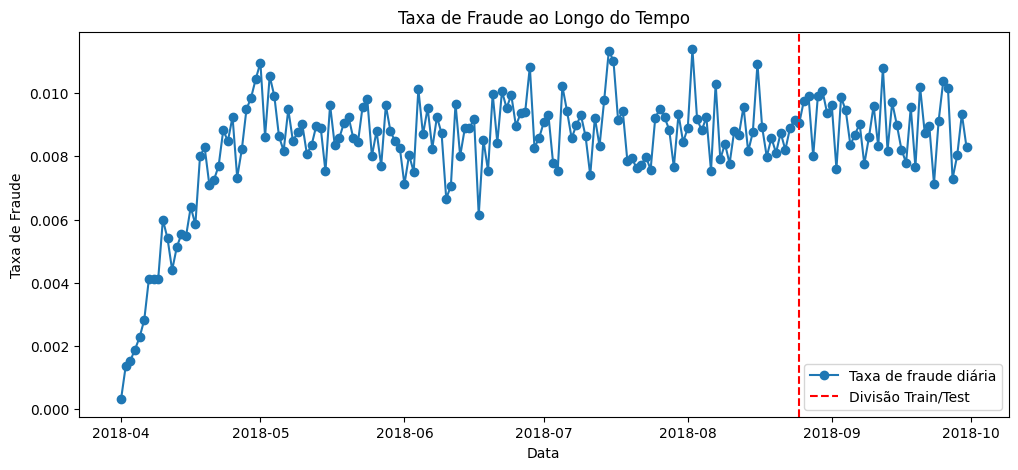

In [15]:
transactions_df["tx_date"] = transactions_df["tx_datetime"].dt.date
fraude_por_dia = transactions_df.groupby("tx_date")["tx_fraud"].mean()
split_date = transactions_df["tx_datetime"].quantile(0.8)

plt.figure(figsize=(12, 5))
plt.plot(fraude_por_dia, marker="o", linestyle="-", label="Taxa de fraude diária")
plt.axvline(split_date.date(), color="red", linestyle="--", label="Divisão Train/Test")
plt.xlabel("Data")
plt.ylabel("Taxa de Fraude")
plt.title("Taxa de Fraude ao Longo do Tempo")
plt.legend()
plt.show()

A divisão em 80% faz sentido, a variação de fraudes diárias não muda muito do padrão visto anteriormente.

In [16]:
transactions_df = transactions_df.sort_values(by="tx_datetime")

split_date = transactions_df["tx_datetime"].quantile(0.8)

train_df = transactions_df[transactions_df["tx_datetime"] < split_date]
test_df = transactions_df[transactions_df["tx_datetime"] >= split_date]

In [18]:
test_df.to_csv("../data/raw/test_data.csv", index=False)

In [17]:
train_df

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud,tx_date
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,2018-04-01
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,2018-04-01
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,2018-04-01
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,2018-04-01
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,2018-04-01
...,...,...,...,...,...,...,...,...,...
1403319,1403319,2018-08-25 10:32:11,4722,9374,12.03,12652331,146,0,2018-08-25
1403320,1403320,2018-08-25 10:32:15,3244,6823,13.41,12652335,146,0,2018-08-25
1403321,1403321,2018-08-25 10:32:19,3521,2612,131.27,12652339,146,0,2018-08-25
1403322,1403322,2018-08-25 10:32:20,1101,6949,92.54,12652340,146,0,2018-08-25


In [18]:
df_merged = pd.merge(train_df,customer_profiles_table, on='customer_id', how='left')
df_train_merged = pd.merge(df_merged, terminal_profiles_table, on='terminal_id', how='left')

df_merged = pd.merge(test_df,customer_profiles_table, on='customer_id',how='left')
df_test_merged = pd.merge(df_merged, terminal_profiles_table, on='terminal_id', how='left')

In [20]:
df_train_merged.to_parquet("../data/processed/ciclo01/train_df_v1.parquet", compression="zstd", index=False)
df_test_merged.to_parquet("../data/processed/ciclo01/test_df_v1.parquet", index=False)

df_test_merged.to_csv("../data/raw/test_data.csv", index=False)

In [19]:
train_df.dtypes

transaction_id              int64
tx_datetime        datetime64[ns]
customer_id                 int64
terminal_id                 int64
tx_amount                 float64
tx_time_seconds             int64
tx_time_days                int64
tx_fraud                    int64
tx_date                    object
dtype: object

In [20]:
train_df = df_train_merged.copy()
test_df = df_test_merged.copy()

In [21]:
train_df.shape

(1403324, 14)

# EDA

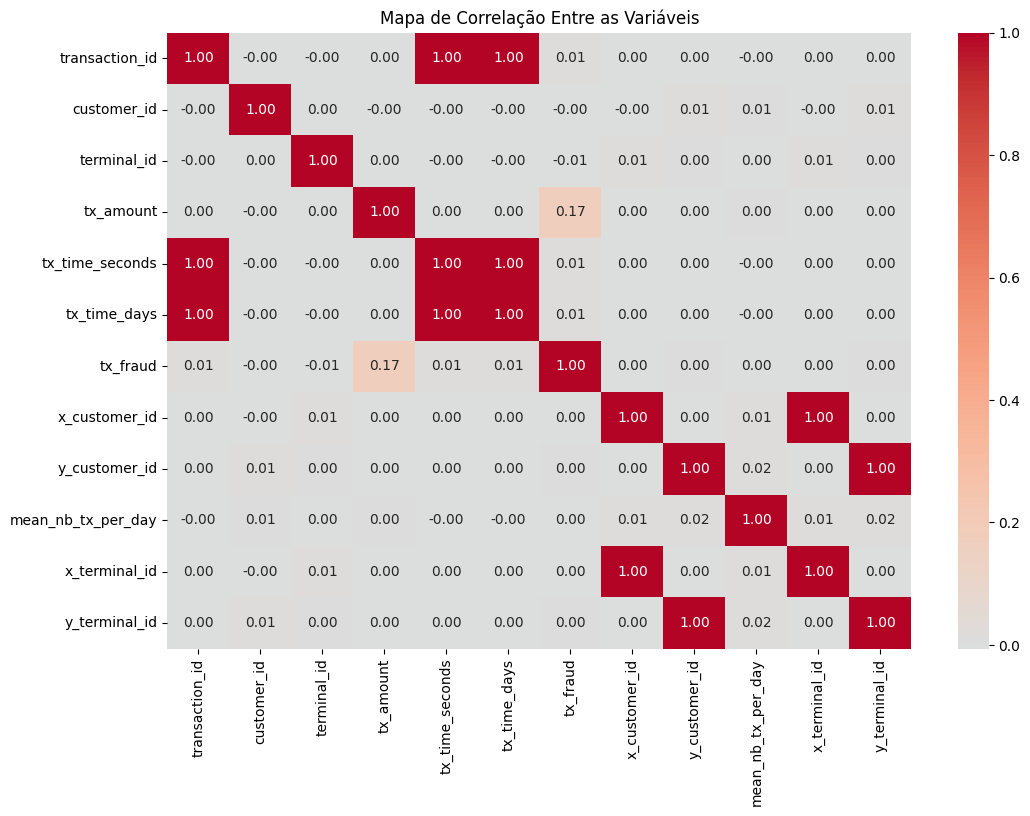

In [22]:
num_attributes = train_df.select_dtypes(include = ['int64', 'float64'])

plt.figure(figsize=(12, 8))
corr_matrix = num_attributes.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Mapa de Correlação Entre as Variáveis")
plt.show()

Como droparemos os ids, a alta correlação de tx_time_seconds acabará.

C:\Users\caiom\AppData\Local\Temp\ipykernel_14444\2519046426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x="tx_fraud", y="tx_amount", showfliers=False, palette="coolwarm")


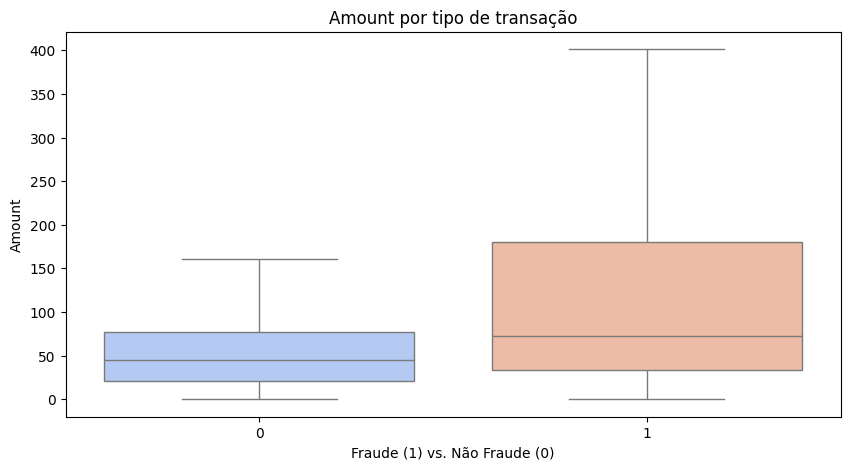

In [23]:
# Analisar tempo entre transações normais vs fraudes
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_df, x="tx_fraud", y="tx_amount", showfliers=False, palette="coolwarm")
plt.title("Amount por tipo de transação")
plt.xlabel("Fraude (1) vs. Não Fraude (0)")
plt.ylabel("Amount")
plt.show()

In [24]:
train_df.groupby("tx_fraud")[["tx_amount"]].mean()

,tx_amount
tx_fraud,
0,52.986005
1,131.298758


O boxplot e a média das transações indica que transações maiores tem chance de serem fraudulentas

C:\Users\caiom\AppData\Local\Temp\ipykernel_14444\2339579971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x="tx_fraud", y="tx_time_seconds", showfliers=False, palette="coolwarm")


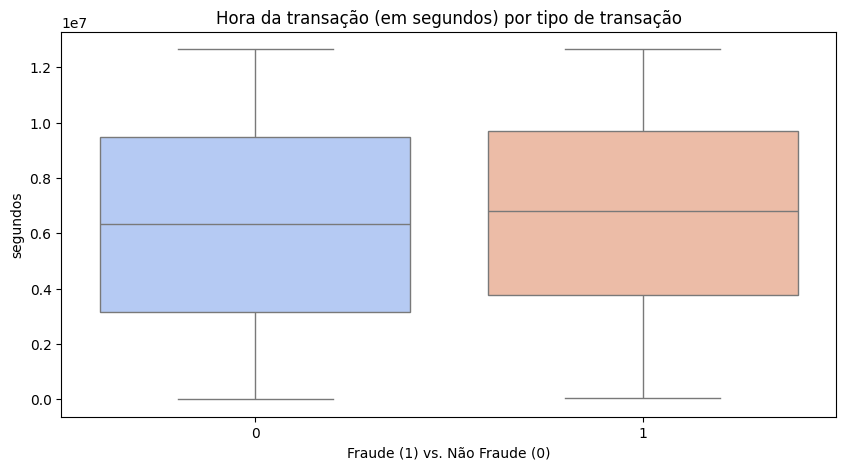

In [25]:
# Analisar tempo entre transações normais vs fraudes
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_df, x="tx_fraud", y="tx_time_seconds", showfliers=False, palette="coolwarm")
plt.title("Hora da transação (em segundos) por tipo de transação")
plt.xlabel("Fraude (1) vs. Não Fraude (0)")
plt.ylabel("segundos")
plt.show()

Não deu pra ver diferenças.

# Treinando Modelo

In [26]:
train_df.sample(5)

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud,tx_date,x_customer_id,y_customer_id,mean_nb_tx_per_day,x_terminal_id,y_terminal_id
271634,271634,2018-04-29 09:16:50,245,6254,49.73,2452610,28,0,2018-04-29,92.171907,80.526386,2.236695,92.952555,81.492643
337794,337794,2018-05-06 07:26:04,2566,5560,93.94,3050764,35,0,2018-05-06,91.923459,11.379939,1.471564,88.382687,11.118042
1193580,1193580,2018-08-03 11:50:30,796,9169,5.46,10756230,124,0,2018-08-03,71.697507,58.448299,2.265047,68.626103,60.892891
222085,222085,2018-04-24 06:19:05,1321,7785,5.40,2009945,23,0,2018-04-24,26.652645,17.065622,2.310941,24.304544,15.644663
611073,611073,2018-06-03 14:57:14,655,8645,112.91,5497034,63,0,2018-06-03,1.434915,61.148532,3.268994,0.287424,57.012004


In [27]:
cols_to_drop = ['transaction_id',"tx_datetime","customer_id","terminal_id", "tx_date","x_customer_id","y_customer_id","x_terminal_id","y_terminal_id","tx_fraud"]
features = [col for col in train_df.columns if col not in cols_to_drop]
X_train, y_train = train_df[features], train_df["tx_fraud"]
X_test, y_test = test_df[features], test_df["tx_fraud"]

In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_model_50 = RandomForestClassifier(n_estimators=50, 
                                  max_depth=10,
                                  min_samples_split=10,
                                  min_samples_leaf=5,
                                  random_state=42, 
                                  class_weight='balanced',
                                  n_jobs=-1)
rf_model_50.fit(X_train, y_train)

rf_model_50_desbalanceada = RandomForestClassifier(n_estimators=50, 
                                  max_depth=10,
                                  min_samples_split=10,
                                  min_samples_leaf=5,
                                  random_state=42, 
                                  n_jobs=-1)
rf_model_50_desbalanceada.fit(X_train, y_train)

rf_model_100 = RandomForestClassifier(n_estimators=100,
                                  random_state=42,
                                  class_weight='balanced',
                                  n_jobs=-1)
rf_model_100.fit(X_train, y_train)

xgb_model_100 = XGBClassifier(n_estimators=100, 
                              max_depth=6, 
                              learning_rate=0.1,
                              scale_pos_weight=4,
                              random_state=42)
xgb_model_100.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# Avaliação

In [29]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

def avaliar_modelo(model, X_train, y_train, X_test, y_test, threshold=0.5):
    """
    Avalia um modelo de Machine Learning comparando desempenho em treino e teste.

    Parâmetros:
    - model: modelo treinado (RandomForest, XGBoost, etc.)
    - X_train: features de treino
    - y_train: labels de treino
    - X_test: features de teste
    - y_test: labels de teste
    - threshold: valor limite para converter probabilidades em classes (default = 0.5)

    Retorna:
    - Dicionário com métricas de treino e teste
    - Imprime matriz de confusão e resultados
    """

    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    y_train_pred = (y_train_proba >= threshold).astype(int)
    y_test_pred = (y_test_proba >= threshold).astype(int)

    train_auc = roc_auc_score(y_train, y_train_proba)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    test_auc = roc_auc_score(y_test, y_test_proba)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    metrics = {
        "AUC-ROC": {"Treino": train_auc, "Teste": test_auc},
        "Precision": {"Treino": train_precision, "Teste": test_precision},
        "Recall": {"Treino": train_recall, "Teste": test_recall},
        "F1-Score": {"Treino": train_f1, "Teste": test_f1},
    }

    # Exibir métricas formatadas
    print(f"\n{'Métrica':<15}{'Treino':<15}{'Teste'}")
    print(f"{'-'*40}")
    for key, value in metrics.items():
        print(f"{key:<15}{value['Treino']:.4f}         {value['Teste']:.4f}")

    print("\nMatriz de Confusão - Treino:")
    print(confusion_matrix(y_train, y_train_pred))

    print("\nMatriz de Confusão - Teste:")
    print(confusion_matrix(y_test, y_test_pred))

In [30]:
print("\n=== Avaliação do Random Forest n_estimators = 50 ===")
avaliar_modelo(rf_model_50, X_train, y_train, X_test, y_test)

print("\n=== Avaliação do Random Forest n_estimators = 50 (Desbalanceada) ===")
avaliar_modelo(rf_model_50_desbalanceada, X_train, y_train, X_test, y_test)

print("\n=== Avaliação do Random Forest n_estimators = 100 ===")
avaliar_modelo(rf_model_100, X_train, y_train, X_test, y_test)

print("\n=== Avaliação do XGBoost ===")
avaliar_modelo(xgb_model_100, X_train, y_train, X_test, y_test)


=== Avaliação do Random Forest n_estimators = 50 ===

Métrica        Treino         Teste
----------------------------------------
AUC-ROC        0.7462         0.6282
Precision      0.0879         0.5032
Recall         0.3269         0.2238
F1-Score       0.1386         0.3098

Matriz de Confusão - Treino:
[[1352699   39094]
 [   7762    3769]]

Matriz de Confusão - Teste:
[[346985    696]
 [  2445    705]]

=== Avaliação do Random Forest n_estimators = 50 (Desbalanceada) ===

Métrica        Treino         Teste
----------------------------------------
AUC-ROC        0.7434         0.6232
Precision      1.0000         1.0000
Recall         0.2248         0.2117
F1-Score       0.3671         0.3495

Matriz de Confusão - Treino:
[[1391793       0]
 [   8939    2592]]

Matriz de Confusão - Teste:
[[347681      0]
 [  2483    667]]

=== Avaliação do Random Forest n_estimators = 100 ===

Métrica        Treino         Teste
----------------------------------------
AUC-ROC        1.0000    

AUC-ROC: 0.6352
Precision: 0.5113
Recall: 0.2235
F1-Score: 0.3110


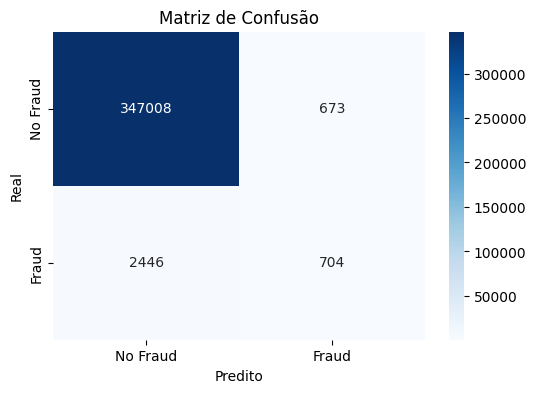

In [31]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = xgb_model_100.predict(X_test)
y_pred_proba = xgb_model_100.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Métricas
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

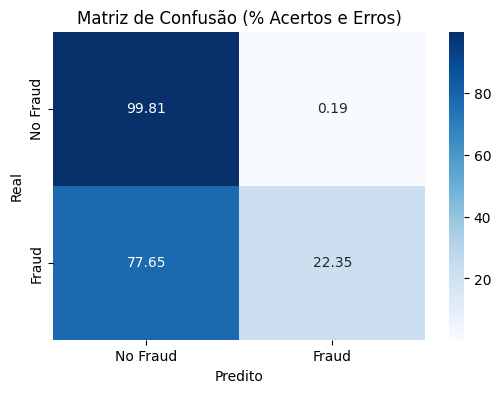

In [32]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão (% Acertos e Erros)")
plt.show()

In [33]:
results_df = X_test.copy()
results_df["Real"] = y_test.values
results_df["Predito"] = y_pred

conditions = [
    (results_df["Real"] == 0) & (results_df["Predito"] == 0),  # TN
    (results_df["Real"] == 0) & (results_df["Predito"] == 1),  # FP
    (results_df["Real"] == 1) & (results_df["Predito"] == 0),  # FN
    (results_df["Real"] == 1) & (results_df["Predito"] == 1)   # TP
]

choices = ["TN", "FP", "FN", "TP"]

results_df["Classificação"] = np.select(conditions, choices, default="Erro")

print(results_df.head())

   tx_amount  tx_time_seconds  tx_time_days  mean_nb_tx_per_day  Real  \
0      53.39         12652350           146            2.386075     0   
1      47.31         12652362           146            2.188905     0   
2      82.51         12652376           146            3.748954     0   
3      22.23         12652377           146            2.719140     0   
4      64.77         12652380           146            3.410066     0   

   Predito Classificação  
0        0            TN  
1        0            TN  
2        0            TN  
3        0            TN  
4        0            TN  


In [34]:
total_amount = test_df['tx_amount'].sum()
total_amount_fraud = test_df[test_df['tx_fraud']==1]['tx_amount'].sum()

baseline = f"{(total_amount_fraud):.2f}"

tp_tx_amount = results_df[results_df["Classificação"] == "TP"]['tx_amount'].sum()
fn_tx_amount = results_df[results_df["Classificação"] == "FN"]['tx_amount'].sum()
fp_tx_amount = results_df[results_df["Classificação"] == "FP"]['tx_amount'].sum()
tn_tx_amount = results_df[results_df["Classificação"] == "TN"]['tx_amount'].sum()

total_ciclo = f"{(fn_tx_amount+fp_tx_amount):.2f}"

print(f""" Avaliação de Resultados (Quanto perdemos por causa de fraudes):
1. Baseline: R$ {baseline}
2. Modelo Ciclo 01: R$ {total_ciclo}
Variação percentual de {round((1 - (float(total_ciclo) / float(baseline))) * 100, 2)}% de redução nos custos
"""
     )

 Avaliação de Resultados (Quanto perdemos por causa de fraudes):
1. Baseline: R$ 411671.78
2. Modelo Ciclo 01: R$ 298138.34
Variação percentual de 27.58% de redução nos custos



## Importância das Variáveis

In [35]:
feature_importance = xgb_model_100.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

In [36]:
importance_df

,Feature,Importance
0,tx_amount,0.786836
2,tx_time_days,0.115347
3,mean_nb_tx_per_day,0.053110
1,tx_time_seconds,0.044707


Claramente estamos precisando de features novas! O modelo esta se baseando quase que 100% apenas no preço 

# Conclusão

Baseado no nosso modelo, conseguimos sair de um prejuízo de `R$ 411.671,78` para `R$ 298.138,34`. O que representou uma redução de prejuízo de 72.42% com um modelo mais simples.

Porém, é importante salientar que podemos estar tendo um overfit em relação a importância das viaráveis. A única variável relevante está sendo o valor, logo, ela está simplificando que valores mais altos são fraudes e menores não. Talvez possamos melhorar isso com algumas novas features.

# Próximo Ciclo


1. Feature Engineering: Gerar novas variáveis
2. Testar exclusão de variáveis com baixa importância e rodar novo modelo.